## 설치:mglearn

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=08c3d692261aeee7aafcaec72712682d3442a2a2878066739dd43f54200ee052
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# 1. K-means clustering

## A. 인위적으로 생성한 데이터셋

### 0) Import libraries

In [2]:
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 1) 데이터 생성과 클러스터링 시각화

In [3]:
# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# clustering model 만들기
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print("클러스터 레이블: \n{}".format(kmeans.labels_))

클러스터 레이블: 
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


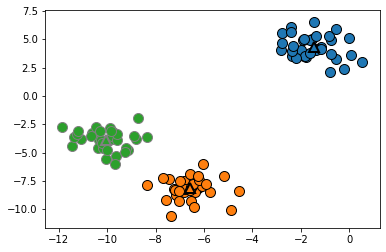

In [5]:
# 클러스터링 결과 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

### 2) K에 따른 클러스터링 결과

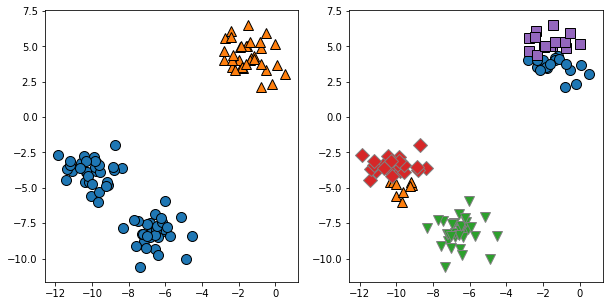

In [6]:
# K를 바꿔가며 클러스터링 결과 살펴보기

fig, axes = plt.subplots(1,2, figsize=(10,5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

### 3) 임의의 형태의(nonspherical) 클러스터를 구분하지 못하는 K-means clustering 알고리즘

Text(0, 0.5, 'features 1')

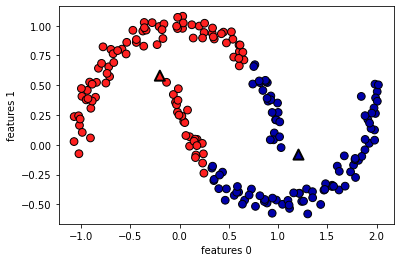

In [7]:
# two moons 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 K-means 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:, 0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("features 0")
plt.ylabel("features 1")

## B. wine 성분에 따른 품종 클러스터링

In [8]:
import numpy as np
import pandas as pd

### 1) wine.csv 데이터 살펴보기

In [9]:
wine = pd.read_csv("wine.csv")
wine
#wine.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
print(wine.shape)
print(wine.columns)

(178, 14)
Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


### 2) 클러스터링 수행(두 개 속성만으로 클러스터링 해보기)

In [11]:
wine2 = wine[["Class", "Alcohol", "Malic acid"]]
#wine2 = wine[["Class", "Nonflavanoid phenols", "Flavanoids"]]
wine2

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [12]:
wine2 = wine[["Class", "Alcohol", "Malic acid"]]
X = np.c_[wine2['Alcohol'], wine2['Malic acid']]
y = wine2['Class']
m = len(wine2) # 정보 개수 (행 개수)

# numpy array 형태로 변환, 형태 변환(m) -> (m,1)
X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)

(178, 2) (178, 1)


### 3) feature normalization

#### $$x_i = \frac{x_i - \mu_i}{s_i}$$

In [13]:
def featureNormalize(X): # X(178,2)
    # 1. 각 feature의 평균, 표준편차 계산
    mu = np.mean(X, axis=0) # (178,2) -> (1,2)
    std = np.std(X, axis=0) # (178,2) -> (1,2)

    # 2. (각 값 - 평균) / 표준편차
    X_norm = (X - mu) / std

    return X_norm, mu, std

In [14]:
X, mu, std = featureNormalize(X)
print(X.shape)

(178, 2)


### 4) 클러스터링 수행

Text(0, 0.5, 'Malic acid')

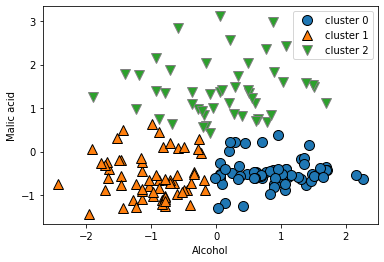

In [15]:
# clustering model 만들기
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel(wine2.columns[1])
plt.ylabel(wine2.columns[2])

### 5) 정답 레이블과 비교

[[51  1  7]
 [ 7 54 10]
 [ 8  8 32]]


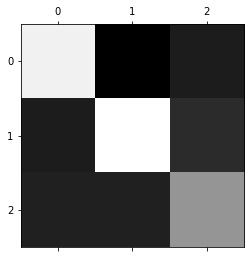

In [16]:
#print(kemans.labels_)
#print(y)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y.reshape(-1), kmeans.labels_+1)
# 내장 kmeans 함수는 레이블을 0부터 시작하므로, +1

print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

# 주의점: 정답 여부는 상관없고, 뭉쳐 있는 지를 살펴봐야함!
# 행: 실제값, 열: 예측값

In [17]:
print(y.reshape(-1).shape)
print(kmeans.labels_.shape)

(178,)
(178,)


In [18]:
print(kmeans.labels_+1)
print(y.reshape(-1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 3 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 1 1
 2 2 1 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 2 1 3 2 3 3 3 1 1 3 3 3 3 1 3 3 3 1 3 2 2 1 3 3 3 1 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [19]:
# silhouette_score
from sklearn.metrics.cluster import silhouette_score
clusters = kmeans.fit_predict(X)
silhouette_score(X, clusters) # 0.39

0.484095893654603

### 6) 클러스터링 수행(모든 속성으로 클러스터링 해보기)

In [20]:
#print(wine[wine.columns[1:]])
wine2 = wine[wine.columns[1:]] # 'Class" column 제외한 모든 컬럼

X = np.c_[wine2[:]]
y = wine['Class']
m = len(wine2) # 정보 개수(행 개수)

# numpy array 형태로 변환, 형태 변환 (m) -> (m,1)
n = wine2.shape[1] # feature의 개수
X = (np.array(X)).reshape(m,n)
y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)

(178, 13) (178, 1)


# 2. Agglomerative clustering

### 0) Import libraries

In [21]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

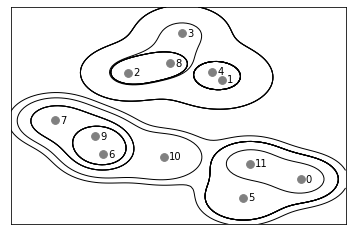

In [22]:
mglearn.plots.plot_agglomerative()

{'color_list': ['g', 'g', 'g', 'g', 'r', 'r', 'c', 'c', 'c', 'b', 'b'],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.1598188624745154],
  [2.078157949404743,
   7.924468768378964,
   7.924468768378964,
   6.550248535823649]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.

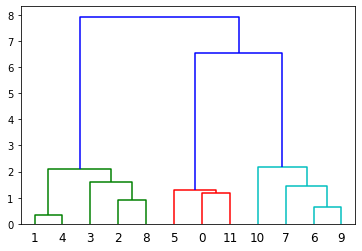

In [23]:
# 덴드로그램 함수, ward 클러스터링 함수 임포트
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 X에 ward 함수 적용
# Scipy 의 ward 함수는 병합 클러스터링을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_arr = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_arr 를 사용해서 덴드로그램 그리기
dendrogram(linkage_arr)

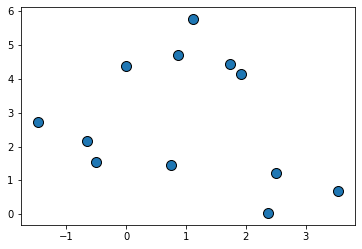

In [24]:
# make_blobs 로 인위적으로 만든 2차우너 데이터 시각화 해보기
mglearn.discrete_scatter(X[:,0], X[:,1], markers='o')

Text(0, 0.5, 'distance between clusters')

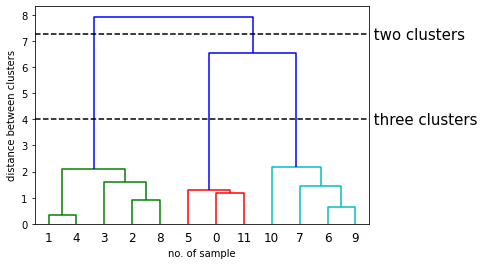

In [25]:
dendrogram(linkage_arr)

# 두 개와 세 개의 클러스터를 구분하는 커트라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size':15})
plt.xlabel("no. of sample")
plt.ylabel("distance between clusters")

# 3. DBSCAN

### 0) Import libraries

In [26]:
from sklearn.cluster import DBSCAN

### 1) 임의의 구형 데이터셋에 대한 DBSCAN

In [27]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블: \n", clusters)

클러스터 레이블: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


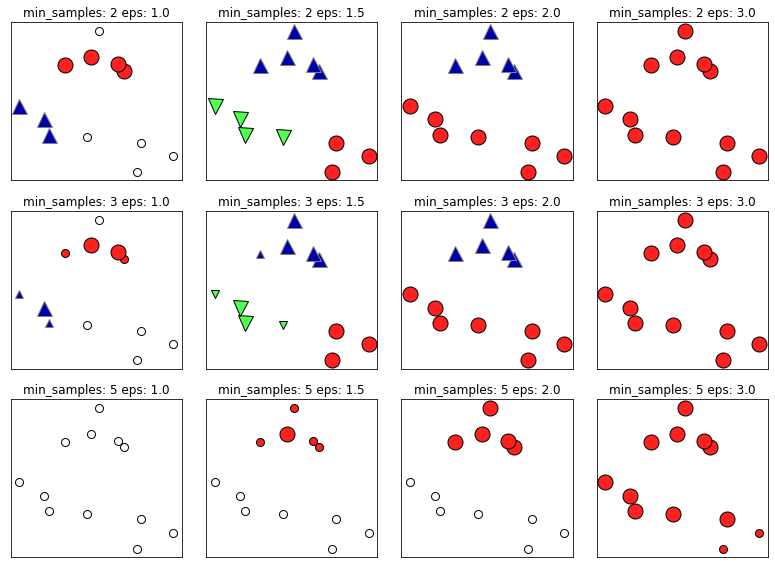

In [28]:
# MinPts 와 epsilon 하이퍼파라미터를 바꿔가며 DBSCAN으로 계산한 클러스터 할당
mglearn.plots.plot_dbscan()

### 2) 임의의 형태(nonspherical) 데이터에 대한 DBSCAN

Text(0, 0.5, 'feature 1')

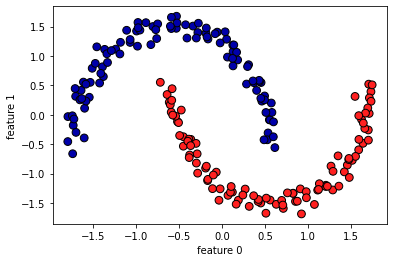

In [30]:
# two_moons 데이터 생성
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균 0, 분산 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
# 클러스터 할당을 표시
plt.scatter(X[:,0], X[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### 3) 임의의 형태(nonspherical) 데이터에 대한 {K-means, Agglomerative, DBSCAN} 클러스터링 알고리즘 비교

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

In [32]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균 0, 분산 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# 사용할 알고리즘 모델을 리스트로 만들기
cluster_algos = [KMeans(n_clusters=2),
                 AgglomerativeClustering(n_clusters=2),
                 DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

### 3)-1 타겟값(y) 이용한 평가

### ex. ARI(adjusted rand index), NMI(normalized mutual information)

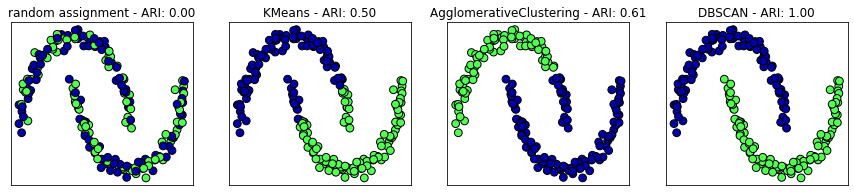

In [35]:
fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 무작위로 할당한 클러스터 시각화
axes[0].scatter(X[:,0], X[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

# 세 가지 알고리즘으로 할당한 클러스터 시각화
for ax, algo in zip(axes[1:], cluster_algos):
    # 클러스터 할당과 클러스터 중심 시각화
    clusters = algo.fit_predict(X)
    ax.scatter(X[:,0], X[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algo.__class__.__name__, adjusted_rand_score(y, clusters)))

### 3)-2 타겟값 없이 평가

### ex. Dunn index, silhouette

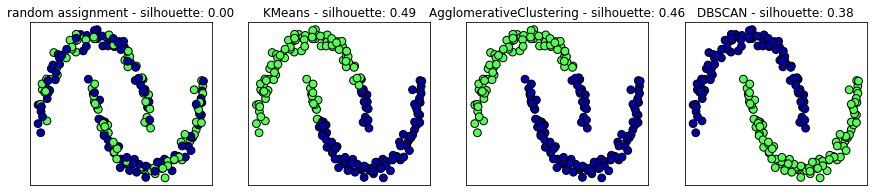

In [38]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 무작위로 할당한 클러스터 시각화
axes[0].scatter(X[:,0], X[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - silhouette: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

# 세 가지 알고리즘으로 할당한 클러스터 시각화
for ax, algo in zip(axes[1:], cluster_algos):
    # 클러스터 할당과 클러스터 중심 시각화
    clusters = algo.fit_predict(X)
    ax.scatter(X[:,0], X[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - silhouette: {:.2f}".format(algo.__class__.__name__, silhouette_score(X, clusters)))